In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

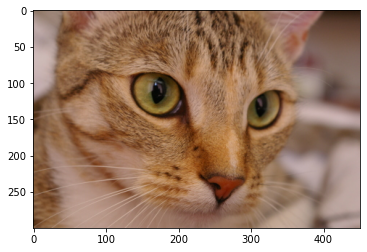

In [2]:
import skimage.data
img = skimage.data.chelsea()
plt.imshow(img)

In [3]:
img  = skimage.color.rgb2gray(img)

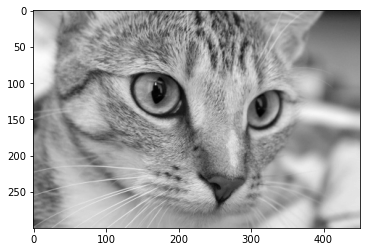

In [4]:
plt.imshow(img, cmap ='gray')

<img src = 'convolutional.png'>

<h3>Preparing filters<h3>

In [7]:
l1_filter = np.zeros((2,3,3))
l1_filter[0,:,:] = np.array([[[-1,0,1],
                              [-1,0,1],
                              [-1,0,1]]])
l1_filter[1,:,:] = np.array([[[1,1,1],
                              [0,0,0],
                              [-1,-1,-1]]])

<h3> Conv Layer<h3>
<img src='convolutional1.jpg'/>

In [10]:
def conv(img, conv_filter):
    if len(img.shape) > 2 or len(conv_filter.shape) > 3:
        if img.shaoe[-1] != conv_filter[-1]:
            print('Errpr: NUmber of channels in both iamge and filter must match')
            sys.exit()
    if conv_filter.shape[1] != conv_filter.shape[2]:
        print('Error: Filter must be a square matrix, i.e., number of rows and columns must match.')
        sys.exit()
    if conv_filter.shape[1]%2==0: 
        print('Error: Filter must have an odd size, i.e., number of rows and columns must be odd.')
        sys.exit()
    feature_maps = np.zeros((img.shape[0] -conv_filter.shape[1] + 1,
    img.shape[1]-conv_filter.shape[1] + 1,
    conv_filter.shape[0]))
    for filter_num in range(conv_filter.shape[0]):
        print('Filter', filter_num + 1)
        curr_filter = conv_filter[filter_num,:]
        if(len(curr_filter.shape)>2):
            conv_map = conv_(img[:,:,0], curr_filter[:,:,0])
            for ch_num in range(1,curr_filter.shape[-1]):
                conv_map = conv_map + conv_(img[:,:,ch_num],curr_filter[:,:,ch_num])
        else:
            conv_map = conv_(img, curr_filter)
        feature_maps[:,:,filter_num]=conv_map
    return feature_maps
    


In [28]:
def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = np.zeros((img.shape))
    for r in np.uint16(np.arange(filter_size/2.0,img.shape[0]-filter_size/2.0+1)):
        for c in np.uint16(np.arange(filter_size/2.0,img.shape[1]-filter_size/2.0+1)):
            curr_region = img[r-np.uint16(np.floor(filter_size/2.0)):r+np.uint16(np.ceil(filter_size/2.0)),c-np.uint16(np.floor(filter_size/2.0)):c+np.uint16(np.ceil(filter_size/2.0))]
            curr_result = curr_region * conv_filter
            result[r, c] = conv_sum
    final_result = result[np.uint16(filter_size/2.0):result.shape[0]-np.uint16(filter_size/2.0),np.uint16(filter_size/2.0):result.shape[1]-np.uint16(filter_size/2.0)]
    return final_result

In [29]:
np.arange(1,3)

array([1, 2])

In [11]:
result= conv(img,l1_filter)

Filter 1


NameError: name 'conv_' is not defined

<h3>ReLu Layter</h3>

In [ ]:
def relu(feature_map):
    relu_out = np.zeros(feature_map.shape)
    for map_num in range(feature_map.shape[-1]):
        for r in np.arange(0, feature_map.shape[0]):
            for c in np.arange(0, feature_map.shape[1]):
                relu_out[r,c,map_num] = np.max([feature_map[r,c,map_num],0])


<h3>Max pooling layer</h3>

In [6]:
l1_filter.shape

(2, 3, 3)